# Methods in Python

In this section, we will talk about methods. These can be thought of as functions that live on the instance or the class.


## Attributes, Fields, Methods

Classes are custom data types and are highly central to object-oriented programming. With object-oriented programming, most of the development will go into defining classes and how they interact.

When defining a new class, we need to specify what kind of data an object of that type should contain, and what functionality it has. These are called the *attributes* of the class/object, and these can be split into two main groups
* *fields* are pieces of data stored in the object.
* *methods* are functions we can call.

Python uses the dot-syntax to access an object's attributes. For example

In [1]:
x = complex(4, 3)

print(x.real)
print(x.imag)
print(x.conjugate())

4.0
3.0
(4-3j)


Here we create a `complex`-type object, which represents a complex number. We can then access its real and imaginary components using the names `x.real` and `x.imag`. These are examples of attributes of an object. The attributes here are `float` numbers, which are examples of *data fields*.


Lastly, we use `x.conjugate()`, which also is a class attribute. In this case, however, the attribute is callable and will behave as a function. Such attributes are called *methods* in Python. This method returns the complex conjugate of the object.

In [2]:
print(type(x.real))
print(type(x.conjugate))

<class 'float'>
<class 'builtin_function_or_method'>


## Special Methods

Class definitions often involve implementing special methods, also known as magic methods (or dunder methods). These are methods we do not expect to call explicitly. Instead, Python calls them for us as needed, depending on the situation. Special methods are handy and lead to elegant, readable, and usable code. Being adept at special methods is crucial if one wants to make good "Pythonic" code.

Special methods have specific names, so Python knows what to call. They all use two leading and two trailing underscores. In [Introduction to Object-Oriented Programming](intro_to_oop.md), we saw an example of this with the constructor: `__init__`.


### The constructor (`__init__`)

The most crucial special method is the constructor, also called the initialization special method (`__init__`). This function is called behind the scenes every time a new instance of a class is defined.

In [3]:
from math import pi


class Sphere:
    def __init__(self, radius):
        self.radius = radius
        self.area = 4 * pi * radius**2
        self.volume = 4 * pi * radius**3 / 3


football = Sphere(11)
print(f"A football of radius {football.radius:.0f} cm")
print(f"Has a surface area of {football.area:.0f} cm^2")
print(f"And a volume of {football.volume:.0f} cm^3")

A football of radius 11 cm
Has a surface area of 1521 cm^2
And a volume of 5575 cm^3


As usual, the first argument is called "self". We also send in any additional arguments that are needed to define the object. In this example, we define a sphere-object, so we send in the radius as an argument. In our constructor, we then choose to store the radius as a data attribute by writing
```python
self.radius = radius
```
This code line defines the instance property `football.radius`, and sets the value to be the same as the function argument. In addition to storing the radius, we have also chosen to compute the area and volume of the sphere and store these as attributes.

(python-oop-special-print)=
### Printing out instances of custom classes

Calling `print` on a custom object produces output that is not super helpful.

In [4]:
print(football)

The print function outputs the type, in this case, `__main__.Sphere` (main because we defined it in our main script, and did not import it). It tells us it is an object of the Sphere class, and then it specifies where in memory the object is stored. The object type can, in many cases, be helpful information, but this information can be retrieved by using the `type()` function.

We can implement the string special method (`__str__`) to print useful information. This special method is automatically called when we try to turn our custom object into a string by writing `str(u)`. When we call `print(u)`, Python first converts the object to a string behind the scenes before printing it (unlike `sys.stdout.write`, where it has to be done manually). So if we implement `Football.__str__` we would get the following happening behind the scenes

* `print(football)` -> `print(str(football))` -> `print(football.__str__())`

If the special method `__str__` is implemented to return a nicely formatted string, we can print our object precisely the way we want.

In [5]:
from math import pi


class Sphere:
    def __init__(self, radius):
        self.radius = radius
        self.area = 4 * pi * radius**2
        self.volume = 4 * pi * radius**3 / 3

    def __str__(self):
        return f"Sphere({self.radius})"


football = Sphere(11)
print(football)

Sphere(11)


A special method similar to the string method is the representation special method (`__repr__`). The main difference is that `__str__` is meant to be human-readable so that it works with `print()`. `__str__` can be informal and ambiguous as long as it is somewhat informative.

On the other hand, we have `__repr__`, which is meant to be unambiguous and more formal. It should be a unique representation of the object so that it can be used to recreate the object later. When calling `repr(u)` we should get a string that we can write to a file, for example. We could later load in and execute that statement to get the object back.  So `eval(repr(u))` should give `u`.

The repr special method is also called when printing elements in a list. So if we print a list containing footballs, the output will be as before, regardless of whether or not an str-method is implemented. To fix this, we would need to add a repr-method.

In [6]:
list_of_spheres = [Sphere(0), Sphere(5), Sphere(10)]
print(list_of_spheres)

[<__main__.Sphere object at 0x7faf6e6f7a60>, <__main__.Sphere object at 0x7faf6e6f67d0>, <__main__.Sphere object at 0x7faf6e6f7df0>]


Now let us implement the `__repr__` method

In [7]:
from math import pi


class Sphere:
    def __init__(self, radius):
        self.radius = radius
        self.area = 4 * pi * radius**2
        self.volume = 4 * pi * radius**3 / 3

    def __str__(self):
        return f"Sphere({self.radius})"

    def __repr__(self):
        return str(self)

Here we use a quick little trick. Because we do not want `__repr__` and `__str__` to produce different outputs, we let `__repr__` use the string special method by writing `str(self)`. Using methods internally when defining classes is common and can save some hassle.

In [8]:
list_of_spheres = [Sphere(0), Sphere(5), Sphere(10)]
print(list_of_spheres)

[Sphere(0), Sphere(5), Sphere(10)]


### Making callable objects

Another important special method is the *call* method (`__call__`). If a class has an implemented call method, we can call an object as if it was a function. Calling an object as a function works because Python automatically uses the call method behind the scenes. This is extremely useful when we want to create objects that represent mathematical functions.

Suppose we want to make a class for quadratic functions that can be written as

$$
f(x) = ax^2 + bx + c.
$$
There are three free parameters the constructor should take in: the coefficients $a$, $b$, and $c$. Then the mathematical function itself is implemented as the `call` special method

In [9]:
class Quadratic:
    def __init__(self, a, b, c):
        self.coefficients = a, b, c

    def __call__(self, x):
        a, b, c = self.coefficients
        return a * x**2 + b * x + c


f = Quadratic(1, 2, 1)
print(f(4))

25


When `f = Quadratic(1, 2, 1)` is assigned, it creates a new class object representing the function $f(x) = x^2 + 2x + 1$. It is not a Python function, but it is *callable*. It can therefore be used as if it were a normal function. Python interprets `f(4)` behind-the-scenes as

* `f(4)` -> `f.__call__(4)` -> `Quadratic.__call__(f, 4)`

Now, quadratic functions can easily be created and used as normal functions

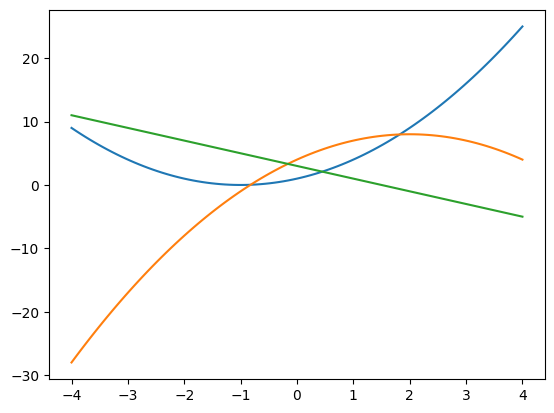

In [10]:
import numpy as np
import matplotlib.pyplot as plt

f = Quadratic(1, 2, 1)
g = Quadratic(-1, 4, 4)
h = Quadratic(0, -2, 3)

x = np.linspace(-4, 4, 101)
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.plot(x, h(x))
plt.show()

There are several advantages to implementing these quadratic functions as actual Quadratic-objects rather than normal Python functions. For one, they now have a custom type, which we can check using `isinstance(f, Quadratic)`. Thus, other parts of the code can *know* that the function is quadratic. The class can also be extended by adding functionality that functions do not have. For example, we can add functionality such as subtracting functions or finding the derivative. Exercise 3 explores how to implement all of these for a general degree polynomial.


### More Special Methods

So far, we have shown the following special methods
* `__init__`
* `__str__`
* `__repr__`
* `__call__`

These are just a few of the possible special methods that can be implemented. The next chapter will explore more examples. For a more comprehensive list, check out [this site](http://www.diveintopython3.net/special-method-names.html).


## Class Methods and Variables

In the last chapters, we implemented the classes first and then *instances* of that class. However, once created, these objects did not affect each other directly; they were the same type of object.

We will see how it is possible to create variables belonging to the _class_, not specific objects.

### Three common uses of class variables and class methods are
* To keep track of the number of objects created that belong to the same class.
* To store global parameters, that should be the same for all instances.
* So-called 'factory methods' which create new objects in different ways than what is commonly done in the constructor.

For the first example, we keep a counter running that increases every time we create a new object of the class

In [11]:
class Rabbit:
    nr_of_rabbits = 0

    def __init__(self, age):
        Rabbit.nr_of_rabbits += 1
        self.age = age


print(Rabbit.nr_of_rabbits)

alice = Rabbit(2)
buddy = Rabbit(4)
charlie = Rabbit(7)

print(Rabbit.nr_of_rabbits)

0
3


`nr_of_rabbits` is a class variable because it belongs to the class itself. The `age` attributes, however, are *instance* variables, as they belong to each instance. In the constructor, we increment `Rabbit.nr_of_rabbits` by 1. Thus, this variable grows each time a new rabbit object is created.

Note that even though there is no *instance* variable called `nr_of_rabbits`, we can access it from the objects too

In [12]:
print(alice.nr_of_rabbits)

3


This is because when Python reads `alice.nr_of_rabbits`, it first checks for an instance variable by this name. If none is found, like in this case, it uses the class variable instead.

This means it is possible to change the instance variable while the class variable remains unchanged.

In [13]:
alice.nr_of_rabbits = 5
print(alice.nr_of_rabbits)
print(buddy.nr_of_rabbits)

5
3


Now there exists an instance variable `alice.nr_of_rabbits`. When Python reads this, it checks for an instance variable and finds it. However, when Python reads `buddy.nr_of_rabbits`, it looks for an instance variable and does not find it. Therefore, it uses the class variable.

We could also contain all class objects in a list as a class variable, which could be very useful.

In [14]:
class Rabbit:
    all_rabbits = []

    def __init__(self, name, age):
        self.name = name
        self.age = age
        Rabbit.all_rabbits.append(self)

    def __repr__(self):
        return f"{self.__class__.__name__}({self.name})"


alice = Rabbit("Alice", 2)
buddy = Rabbit("Buddy", 4)
charlie = Rabbit("Charlie", 7)

print(charlie.all_rabbits)

[Rabbit(Alice), Rabbit(Buddy), Rabbit(Charlie)]


### Parameters as class variables

Class variables are well-suited for storing parameters shared by all class instances. Take, for example a Pendulum class

In [15]:
class Pendulum:
    G = 9.81

    def __init__(self, M=1, L=1):
        self.M = M
        self.L = L

We can create pendulums of different lengths and masses and then use `self.M` and `self.L` to refer to these in calculations. We let `G` be a class variable because all our pendulums typically experience the same gravity.

In [16]:
p = Pendulum(M=4, L=2)
print(p.M)
print(p.L)
print(p.G)

4
2
9.81


One benefit of defining parameters as class variables is that changing the parameters for all objects is easy. This holds for those objects created earlier and those we create in the future.

In [17]:
Pendulum.G = 10
print(p.G)

10


Thus, the parameter has a single, definite representation in our system, which is usually a good approach.

(class-methods)=
## Class Methods

In addition to defining class variables, we can define class methods. Class methods are methods we call on the *class*, not on a specific object. The most straightforward approach to creating a class method in Python is to use the `@classmethod` decorator. One of the typical use cases for a class method is *factory methods*. Factory methods are similar to the constructor as they create class instances, but differently.

In [18]:
import numpy as np


class Sphere:
    def __init__(self, radius):
        self.radius = radius

    def volume(self):
        return 4 * np.pi * self.radius**3 / 3

    @classmethod
    def from_volume(cls, volume):
        radius = (3 * volume / (4 * np.pi)) ** (1 / 3)
        return cls(radius)

Here, we make our `Sphere` class normally, creating spheres by specifying their radius. However, sometimes, we might want to create a sphere with a given volume instead. Since Python only allows one constructor, we create a *factory method*. We then use the `@classmethod` decorator.
For normal *instance* methods, the first argument to a method is always the self, but now we call the first argument `cls`, which is short for "class".

We can use the class method as follows

In [19]:
ball = Sphere.from_volume(5000)
print(f"Radius: {ball.radius:.1f} \t Volume: {ball.volume():.1f}")

Radius: 10.6 	 Volume: 5000.0


Here, because we defined the method as a class method,
``` Python
Sphere.from_volume(5000)
```
is interpreted as
``` Python
Sphere.from_volume(Sphere, 5000)
```
Thus, `cls` would refer to the class itself within the class method, precisely like `self`` refers to the object itself in normal instance methods.

Factory methods are commonly used to choose the correct subclass based on user input. As an example, consider the `ODESolver` class hierarchy again and say we want to let the user pass a string to the class to specify the solver
``` Python
solver = ODESolver.create_solver('FE',f)
```
One may think that this could also be solved by simply adding a string argument to the `ODESolver` constructor
``` Python
solver = ODESolver('FE',f)
```
However, this will not work since we are not creating an `ODESolver` instance but an instance of one of the subclasses.



The solution is a factory method that knows about the subclasses
``` Python
@classmethod
def create_solver(cls, solver_type, f):
    SOLVER_TO_CLS_MAP = {
        'FE':  ForwardEuler,
        'BE': BackwardEuler,
        'RK4': RungeKutta4
    }

    if solver_type not in SOLVER_TO_CLS_MAP:
        raise ValueError(f'Bad solver type {message_type}')

    return SOLVER_TO_CLS_MAP[solver_type](f)
```



### Other factory method use cases

* Create factory methods for unit testing, i.e., initiate some instances with predefined parameters.
* Initiating objects based on *random* data.
* Create objects from a file. A factory method `from_file` could read from a data file and set up an object accordingly. We can also create a method for saving all the data in the object to a file, which can be read later. This would be an example of *checkpointing*, a handy feature for computations and simulations that take a long time to run.



## Static Methods

*Static methods* differ from both class methods and instance methods. These are methods belonging to a class that are called without using any class or object information. Static methods are applied with the `@staticmethod` decorator. Unlike instance and class methods, the static methods do not take any particular variable in as the first variable.

The static methods do not use information about the class or object and _could_ be a stand-alone function. However, we like to implement it as a static method because the functionality is stored within the class, making the whole code cleaner.

In [20]:
from datetime import date


class Person:
    def __init__(self, name, birthday):
        self.name = name
        self.birthday = birthday

    def age(self):
        return self.calculate_age(self.birthday)

    @staticmethod
    def calculate_age(birthday):
        b_day, b_month, b_year = birthday.split(".")
        b_day = int(b_day)
        b_month = int(b_month)
        b_year = int(b_year)
        today = date.today()
        return (today.year - b_year) - ((today.month, today.day) < (b_month, b_day))

The static method `calculate_age` computes a person's age, given that person's birthday is passed as a string on the form "dd.mm.yyyy".
We have used a clever trick to determine whether the person has had a birthday this year. Starting with the year difference and subtracting a boolean value (`(today.month, today.day) < (b_month, b_day)`). Python interprets true as 1 and false as 0, so we can subtract this from the year difference.
We can call this function as

In [21]:
print(Person.calculate_age("20.02.1975"))

48


This function is a "stand-alone" function; it does not depend on any class or instance data. However, after we have created this method, we can use it in the `age` method, which returns the age of a given person-object.

In [22]:
p = Person("Joe Schmoe", "17.04.1983")
print(p.age())

print(p.calculate_age)

40
<function Person.calculate_age at 0x7faf40c46dd0>


### Class Methods vs. Static Methods (1)
Static methods and class methods appear to be quite similar. The difference can be understood by considering the Python concept of *bound methods*
* An ordinary function in Python is often called an unbound function because it is not bound to a particular class or object.
* On the other hand, a regular instance method defined in a class becomes *bound to an instance* every time a new class instance is generated. When we create a new instance, we also create a new function object, which is bound to that instance and thereby becomes a bound method. Each instance has its method object. The most important effect of this binding is that the instance is automatically passed as the first argument to the method (`self`).



### Class Methods vs. Static Methods (2)
Using the `@classmethod` decorator simply tells Python that this function should be bound to the class, not the instance. No matter how many instances we create, there will only exist one method object. When it is called, the class (`cls`) is automatically passed as the first argument, not the instance (`self`). The method can still be accessed through a specific instance, but it remains bound to the class, and the class is passed as the first argument.
* Finally, when we use the `@staticmethod` decorator, we tell Python that this function should not be bound to the class or the instance but remain an unbound function. It is still defined within the class's _namespace_ and can be accessed through the class or a specific instance (as for `calculate_age` above). It remains an unbound Python function, and no arguments get passed automatically.



### Class Methods vs. Static Methods (3)
These differences lead to the following "rules" for when to use the different methods
 * Use a regular instance method if it needs access to instance data. This is by far the most common use case in OOP.
 * If the method does not need access to instance data, but it needs access to class data, define it as a class method.
 * Finally, if the method logically belongs to the class but does not operate on either
 instance data or class data, it should be a static method. In other words, neither `self, `cls`, nor the class name appears inside the function body.



#### Quiz: why is this factory method a @classmethod, not a @staticmethod?
``` Python
@classmethod
def create_solver(cls,solver_type,f):
    SOLVER_TO_CLS_MAP = {
        'FE':  ForwardEuler,
        'BE': BackwardEuler,
        'RK4': RungeKutta4
    }

    if solver_type not in SOLVER_TO_CLS_MAP:
        raise ValueError(f'Bad solver type {solver_type}')

    return SOLVER_TO_CLS_MAP[solver_type](f)
```



#### Answer:
That was a trick question. The method could be a `@staticmethod` since neither `self` nor `cls` appear inside the function body. However, it is still a good idea to keep it a `@classmethod` because
* We could have made the solver to class map more flexible by using the built-in function `cls.__subclasses()`, which would only work with a class method.
* It is common in Python to implement factory methods as class methods, so following this convention makes the code more readable. (However, in C++ and other programming languages, it is common to implement factory methods as static methods.)


## A 3D vector class

In this section's final part, we will try to bring it together and implement several methods in a specific class. By adding more and more functionality to this class, we illustrate different special methods in Python and how these work.

As a specific case example, we will implement a class for three-dimensional vectors `Vector3D`. We want objects of this class to behave mathematically as vectors, and we will add functionality to do vector arithmetic.


### The constructor (`__init__`)

The most fundamental method of any class is its *constructor*, which is automatically called under the creation of a new class instance. In Python, the constructor is called `__init__` (short for *initialize*). To define a 3D vector, we need to specify its three cartesian coordinates, which we call $x$, $y$ and $z$.

In [23]:
import numpy as np


class Vector3D:
    """A class representing 3D cartesian vectors."""

    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

This constructor does not do much other than save the three coordinates as internal attributes. This is necessary so that the object remembers its coordinates and can use them later. The string on line 4 is an example of a *docstring*.


### Pretty printing

Next, we want to be able to print out vectors so that we can check our results. We implement this using the string special method (`__str__`). If we were just implementing this in an editor, we would keep editing our file. In the notebook, we do not want to repeat the whole class for each cell. Instead, we extend our existing class as follows

In [24]:
class Vector3D(Vector3D):
    def __str__(self):
        return f"({self.x:g}, {self.y:g}, {self.z:g})"


u = Vector3D(0, 4, -2)
print(u)

(0, 4, -2)


Here, extending the class by writing `Vector3D(Vector3D)` works because of *inheritance*, as we will explain later. For now, it can be thought of as adding code to the existing class. However, any vectors defined before we extend the class will _not_ be updated. So in the notebook, we must remember to define new vector instances when testing our code.


### The repr method

Our string special method works nicely and can be used to print out vectors in our code. Recall, however, that when printing sequences such as lists, they will still print inadequately

In [25]:
print([u, u])

[<__main__.Vector3D object at 0x7faf40c23100>, <__main__.Vector3D object at 0x7faf40c23100>]


The solution is to add the `__repr__` method, which should provide a string we can use to recreate the object. We can add it as follows

In [26]:
class Vector3D(Vector3D):
    def __repr__(self):
        return f"Vector3D({self.x}, {self.y}, {self.z})"


u = Vector3D(0, 4, -2)
v = Vector3D(3, 0, 1)

vectors = [u, v]
print(vectors)

[Vector3D(0, 4, -2), Vector3D(3, 0, 1)]


Here the vectors get written out in a form that can be used to recreate the objects with `eval`. However, a small trick we can use to make the `__repr__` more general is to exploit the fact that all classes in Python "know" their name. Look at the following code

In [27]:
class Vector3D(Vector3D):
    def __repr__(self):
        return f"{type(self).__name__}({self.x}, {self.y}, {self.z})"

So instead of writing the name `Vector3D` directly into the code (known as "hard coding" it), we use the variable `type(self).__name__` to refer to the name of the class. Firstly, `type(self)` will return the class, `Vector3D`. Then `.__name__` will access the name of the class, which will be the string `"Vector3D"`.

What is the benefit of doing this? If we later want to change the `Vector3D` name to something else, the method will update automatically. Secondly, and perhaps more important is that we can also use `Vector3D` to create new classes through inheritance. Then the new classes will have `repr` automatically referring to their own class, not their parent class.


## Vector Arithmetic

The main goal of our `Vector3D` class is to automate vector arithmetic, so let us extend our class to handle this. It makes sense to start by focusing on addition and subtraction.

### Addition

If we want to be able to add two vectors together, we need to add a method that defines how such an operation is to be handled. We could, for example, define an `add` method, and write `u.add(v)` to compute $u + v$. However, this is not very elegant. Ideally, writing `u + v` in our code should be possible. A statement like this uses the *binary operator* `+` (binary meaning it acts on two variables/objects). For any such operators in Python, there exist one or more special methods associated with it. So when one writes `a + b`, Python will automatically interpret this behind the scenes as `a.__add__(b)`. Let us implement this method.

The result of adding two vectors together is a brand-new vector. Our `__add__` method must create and return a new `Vector3D`-object. If this is confusing, imagine the following code snippet
```python
u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)
w = u + v
```
In this case, adding `u` and `v` to define `w` should not change the values of `u` and `v`. It should create a *new vector object* inside the special method `__add__`.

In [28]:
class Vector3D(Vector3D):
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        z = self.z + other.z
        return Vector3D(x, y, z)


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)
w = u + v

print(f"{u} + {v} = {w}")

(2, 0, -2) + (2, 4, 2) = (4, 4, 0)


This works just as it should. However, we have again hard-coded the name of our class in the method implementation itself. It would be *even better* to do as follows

In [29]:
class Vector3D(Vector3D):
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        z = self.z + other.z
        return self.__class__(x, y, z)


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)
w = u + v

print(f"{u} + {v} = {w}")

(2, 0, -2) + (2, 4, 2) = (4, 4, 0)


This makes our code more general and better suited for future extensions.


### `self` and `other`

We just defined our addition method with the statement `def __add__(self, other)`, which can be confusing.  To better understand this, it can be helpful to understand why there must be two arguments. This is because we are talking about *binary* addition, meaning two things are added together. When we write `a + b`, these two objects are added together so that `self` will refer to `a`, and `other` will refer to `b`. The following is what happens behind the scenes

1. We write `a + b`
2. Which Python interprets as `a.__add__(b)`
3. Which in turn actually means `Vector3D.__add__(a, b)`

So in the method we have written, which has the signature `__add__(self, other)`, we see that `a` is the self, and `b` is the other.

Please note that the names `self` and `other` are *not* reserved keywords in Python, and it is possible to pick other names for these variables. However, `self` and `other` are very commonly used and are considered strict conventions. It is recommended to stick to these unless there is a good reason to deviate.


### Vector-scalar addition

We have added a method to add two vectors together, so we can write `u + v`. What happens if we try to add a vector and an integer `u + 1`?
```Python
print(u + 1)
```
We get an error: `AttributeError: 'int' object has no attribute 'x'`.

This error happens because the `other`-object is no longer a `Vector3D`-object, but an `int`. It is an `AttributeError` because we try to use `other.x`, but the integer has no `.x` attribute to access. In this case, we check what type `other` is and treat it differently depending on its type. We know `self` is a `Vector3D`, so we do not need to check this.

Now, what behavior do we want if we try to add an integer? The number could be added to each component separately as
```
if isinstance(other, (int, float)):
    self.x += other
    self.y += other
    self.z += other
```
This is how a NumPy array works. In our case, however, we want the `Vector3D` class to represent a mathematical vector. Adding a vector and a scaler together does not make sense because they have different dimensions. Therefore, the code should throw an exception instead. Let us generalize this to throw an error if we try to add anything other than another vector object

In [30]:
class Vector3D(Vector3D):
    def __add__(self, other):
        if isinstance(other, Vector3D):
            x = self.x + other.x
            y = self.y + other.y
            z = self.z + other.z
            return Vector3D(x, y, z)
            # or return self.__class__(x, y, z)

        else:
            raise TypeError(f"cannot add vector and {type(other)}")


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)

print(f"{u} + {v} = {u + v}")

try:
    print(f"{u} + {1} = {u + 1}")
except TypeError as e:
    print(f"{u} + {1} gives 'TypeError: {e}'")

(2, 0, -2) + (2, 4, 2) = (4, 4, 0)
(2, 0, -2) + 1 gives 'TypeError: cannot add vector and <class 'int'>'


It could be argued that one should be able to add a `Vector3D` and a list of three numbers, e.g., `u + [1, 3, 1]`. We leave this as an exercise for the reader. For now, we move on to other operations.


### Subtraction

Extending our class to handle the subtraction of vectors is very similar to addition. We use the subtraction special method instead (`__sub__`).

In [31]:
class Vector3D(Vector3D):
    def __sub__(self, other):
        if isinstance(other, Vector3D):
            x = self.x - other.x
            y = self.y - other.y
            z = self.z - other.z
            return Vector3D(x, y, z)
            # or return self.__class__(x, y, z)

        else:
            raise TypeError(f"cannot subtract vector and {type(other)}")


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)

print(f"{u} - {v} = {u - v}")

try:
    print(f"{u} - {1/2} = {u + 1/2}")
except TypeError as e:
    print(f"{u} - {1/2} gives 'TypeError: {e}'")

(2, 0, -2) - (2, 4, 2) = (0, -4, -4)
(2, 0, -2) - 0.5 gives 'TypeError: cannot add vector and <class 'float'>'


### The unary negative operator (aka "minus")

We have now defined and implemented what `u + v` and `u - v` means for our vectors. From mathematics, we know that `u - (-v)` is equivalent to `u + v`, but will Python understand this? If we were doing test-driven development (such as in Project 0), this would be a good example of a test to add.

The operation `u - (-v)` does *not* work but instead throws the following error message
```
TypeError: bad operand type for unary -: 'Vector3D'
```
This can be a confusing message, so let us break it down.

In the expression `u - (-v)`, there are *two* subtraction operators, both represented by `-`. The first is the standard binary subtraction which acts on the two variables `u` and `(-v)`. This corresponds to `__sub__`, which we have already added. The second subtraction in `(-v)` does, however, not act on two variables and so is instead a *unary subtraction* (unary meaning "acting on one operand"). This operation is coupled to the special method `__neg__` (for negative). When Python interprets our code, it must first resolve the parentheses and compute the negative of `v`, and we have not defined how this is done for our class, which is why we get the error message "bad operand type for unary -".

Let us now define the `__neg__` special method. As this is a unary operator, we only take in the `self` argument and skip the `other` (as there is no "other" vector in this case)

In [32]:
class Vector3D(Vector3D):
    def __neg__(self):
        return Vector3D(-self.x, -self.y, -self.z)
        # or return self.__class__(-self.x, -self.y, -self.z)


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)

print(f"{u} - (-{v}) = {u - (-v)}")

(2, 0, -2) - (-(2, 4, 2)) = (4, 4, 0)


The code now works. First, the `__neg__` method is used to compute `(-v)`, then `u - (-v)` is computed using `__sub__`.

Another small detail one can note here is that if we had implemented our `__neg__` method *first*, we could have relied on this when implementing `__sub__`.

In [33]:
class Vector3D(Vector3D):
    def __sub__(self, other):
        if isinstance(other, Vector3D):
            return self + (-other)
        else:
            raise TypeError(f"cannot subtract vector and {type(other)}")


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)

print(f"{u} - {v} = {u - v}")

(2, 0, -2) - (2, 4, 2) = (0, -4, -4)


This `__sub__` method behaves as before, but the implementation now relies on `__neg__` (and `__add__`) by saying that `u - v` is equivalent to `u + (-v)`. Tricks like these can be useful when implementing arithmetic methods.


### Multiplying vectors

We now want to add functionality for multiplying vectors. For 3D vectors, several types of multiplication exist. We want to do both the dot product and the cross product. Let us implement these as normal methods (not special methods) first. As a reminder, the two multiplications are defined as follows

$$u \cdot v = (x_1, y_1, z_1) \cdot (x_2, y_2, z_2) = x_1x_2 + y_1y_2 + z_1z_2.$$

$$u \times v = (x_1, y_1, z_1) \times (x_2, y_2, z_2) = (y_1z_2 - z_1y_2, z_1x_2 - x_1z_2, x_1y_2 - y_1x_2).$$

An important point here is that the dot-product should return a number (i.e., `int` or `float`), while the cross-product should return a new vector object. The two methods can look as follows

In [34]:
class Vector3D(Vector3D):
    def dot(self, other):
        return self.x * other.x + self.y * other.y + self.z * other.z

    def cross(self, other):
        x = self.y * other.z - self.z * other.y
        y = self.z * other.x - self.x * other.z
        z = self.x * other.y - self.y * other.x
        return Vector3D(x, y, z)

We can now use `u.dot(v)` and `u.cross(v)` in our code, which is a suitable syntax as it spells out exactly what kind of vector multiplication we are computing. We can, of course, _also_ add them as special methods if we want. It is quite easy because we can call the `dot` and `cross` methods (this is called "aliasing").

Let us decide that we want `u*v` to be interpreted as the dot product. This multiplication operator is associated with the special method `__mul__`. So we can write

In [35]:
class Vector3D(Vector3D):
    def __mul__(self, other):
        """Interpret u*v as the dot product"""
        return self.dot(other)

We have now "used up" the asterisk multiplication operator in Python. What syntax can be chosen for our cross-product? One option is to use the code syntax `u @ v` to mean the cross-product. `@` is a binary operator associated with the special method `__matmul__` (short for "matrix multiplication). None of the built-in Python objects uses it, but it is available for mathematics, where we want access to more operators. (Note that for NumPy arrays, `@` is implemented as the dot-product for 1D arrays or matrix multiplication, while `*` means component-wise multiplication).

In [36]:
class Vector3D(Vector3D):
    def __matmul__(self, other):
        """Interpret u @ v as the cross product"""
        return self.cross(other)


u = Vector3D(1, -1, 0)
v = Vector3D(1, 4, 2)

print(f"{u} * {v} = {u * v}")
print(f"{u} @ {v} = {u @ v}")

(1, -1, 0) * (1, 4, 2) = -3
(1, -1, 0) @ (1, 4, 2) = (-2, -2, 5)


A useful property of the dot product is that two vectors are perpendicular if, and only if, the dot product is equal to zero ($u \cdot v = 0 \Leftrightarrow u \perp v$). We can add a `perpendicular` method, which checks if two vectors are perpendicular

In [37]:
class Vector3D(Vector3D):
    def perpendicular(self, other):
        return np.isclose(self * other, 0)


u = Vector3D(1, -1, 0)
v = Vector3D(1, 4, 2)
print(u.perpendicular(v))

False

Note that we use `np.isclose` because the coordinates of the vectors can easily be `float`, and comparing floating points to zero is a common pitfall due to floating point errors.

From linear algebra, it can be proven that if we define a vector as the cross product of two vectors, i.e.,

$$
w = u \times v
$$

Then the new vector $w$ will be perpendicular to $u$ and $v$. This can be used to test our code.

In [38]:
w = u @ v

# Printing answer
print(f"Is u ⊥ v? {u.perpendicular(v)}")
print(f"Is w ⊥ u? {w.perpendicular(u)}")
print(f"Is w ⊥ v? {w.perpendicular(v)}")

# Asserting answer
assert w.perpendicular(u)
assert w.perpendicular(v)

Is u ⊥ v? False
Is w ⊥ u? True
Is w ⊥ v? True


### Scalar multiplication

We have now defined vector-vector multiplication, but it is possible to multiply vectors by scalers (i.e., numbers). We can, for example, compute $3u$, which corresponds to multiplying each vector component by the number 3 separately.

We now want to be able to write `3*u` or `u*3` in our code to capture this mathematical operation. Let us first see what happens if we try this with our current code.

In [39]:
print(3 * u)

TypeError: unsupported operand type(s) for *: 'int' and 'Vector3D'

This error tells us that multiplication is not defined between integer and vector objects. Interestingly, if we flip the operators, we get a different error message!

In [40]:
print(u * 3)

AttributeError: 'int' object has no attribute 'x'

The second error is similar to the one we got for addition earlier. When we write `u*3`, this is interpreted as `u.__mul__(3)`, which in turn is `Vector3D.__mul__(u, 3)`, and so `self` is `u` and `other` is `3`. Because we defined `__mul__` as the dot-product, we try to use `other.x`, which is `3.x`, which does not exist. Let us fix this first and then get back to the first error message.

To fix this, we should rewrite our `__mul__`-method to do different things depending on if the `other` variable is a vector or a scalar. In programming, this is known as [*function overloading*](https://www.scaler.com/topics/function-overloading-in-python/), which happens when we define a function or method to do different things depending on context. In this case, we overload the `*` operator to mean either vector-vector multiplication or vector-scalar multiplication, depending on the parameters given.

In [41]:
class Vector3D(Vector3D):
    def __mul__(self, other):
        if isinstance(other, Vector3D):
            # Vector-vector multiplication
            return self.dot(other)

        elif isinstance(other, (int, float)):
            # Vector-scalar multiplication
            return Vector3D(self.x * other, self.y * other, self.z * other)

        else:
            # Unknown
            raise TypeError(f"cannot multiply vector and {type(other)}")


u = Vector3D(1, -1, 0)
v = Vector3D(1, 4, 2)

print(f"u = {u}")
print(f"3*u = {u*3}")
print(f"u*u = {u*u}")

u = (1, -1, 0)
3*u = (3, -3, 0)
u*u = 2


We now see that we can compute `u*3`, and check that we can compute the dot-product as before. One should always recheck that they have not broken old functionality when they go back and change a function or method. If proper tests are implemented, this will automatically get checked when one runs `pytest`. Here we have to do it manually.

From our implementation of `__mul__`, we now check the `other` operand and choose the correct behavior. But what about for `3*u`? This still throws a `TypeError: unsupported operand type(s) for *: for 'int' and 'Vector3D'`. So `u*3` does work, but `3*u` does not. Let us try to understand why one works and the other fails. When we write these statements, they are interpreted as follows
* `3*u` -> `3.__mul__(u)` -> `int.__mul__(3, u)`
* `u*3` -> `u.__mul__(3)` -> `Vector3D.__mul__(u, 3)`

The central point is that the operand to the left of the multiplication sign (`*`) decides which class's `__mul__` method is called. So in `3*u` it is not our method that is used, but `int`'s. The built-in `int` has not been implemented to interact with our custom class.

Mathematically speaking, it is much more common to write $3u$ than $u\cdot 3$, so saying we should write `u*3` in our code is not satisfactory. So what can be done? This problem is so common that Python has a built-in workaround in the form of the special method called `__rmul__` (for right multiply). This method is called automatically if the first operand's `__mul__` throws an error. So if we implement `__rmul__`, we get the following cascade
* `3*u` -> `3.__mul__(u)` -> Throws an error -> `u.__rmul__(3)` -> `Vector3D.__rmul__(u, 3)`

Effectively, `__rmul__` can be considered a "backup" method. One important thing to notice in this cascade is that the operands effectively get flipped when this backup is used. To implement `__rmul__`, we can use the `__mul__` we already implemented as follows

In [42]:
class Vector3D(Vector3D):
    def __rmul__(self, other):
        return self * other


u = Vector3D(4, -6, 2)
print(2 * u)

(8, -12, 4)


This brings up an essential point about operators in programming. While some operators are generally considered commutative in mathematics, meaning the order can be changed without changing the result ($a+b = b+a$), we see that this is not the case in Python. We could, for example, have an `__add__`-method that differs from the `__radd__` method such that `a + b` and `b + a` would behave differently. For example, adding strings or lists together in Python is non-commutative.

In [43]:
a = [1, 2, 3]
b = [4, 5, 6]

print(a + b)
print(b + a)

[1, 2, 3, 4, 5, 6]
[4, 5, 6, 1, 2, 3]


### Adding 'properties' to our class (Length)

Often we are interested in the length of a vector, or we want a unit vector with the same orientation as a given vector. Let us add this as well by using previously introduced Python properties. The main point was that there were decorators we could use (`@property`).

A quick note: In Python, a length special method (`__len__`) is called when we write `len(u)`. This is typically meant for sequences such as lists where the length equals the number of elements. Because of this, the `__len__` method *has* to return an integer. For our case, a general vector often has a decimal length, so the `__len__` method would not work, which is why we use a property instead.

Let us first add the length property. To compute the length of a vector, we first take the dot-product of the vector with itself and then take the square root, i.e., $|u| = \sqrt{u \cdot u}$.

In [44]:
class Vector3D(Vector3D):
    @property
    def length(self):
        return np.sqrt(self * self)


u = Vector3D(2, -2, 1)
print(f"{u} has a length of {u.length}")

(2, -2, 1) has a length of 3.0


Here the length property is easy to add because we have already defined the dot product for a vector in `__mul__`, so we can simply write `sqrt(self*self)`. Recall that the `@property` makes the method looks like a `float` variable from the outside, so we write `u.length` instead of `u.length()`.

Let us now make a `@length.setter` method so we can also *scale* the length of the vector. When we scale a vector, we typically mean shifting all three vectors so that the length changes while the orientation stays the same. All three components can be scaled by the same ratio

In [45]:
class Vector3D(Vector3D):
    @property
    def length(self):
        return np.sqrt(self * self)

    @length.setter
    def length(self, new_length):
        ratio = new_length / self.length
        self.x *= ratio
        self.y *= ratio
        self.z *= ratio


u = Vector3D(2, -2, 1)
print(f"{u} has a length of {u.length}")

# Rescale u
u.length *= 2

print(f"{u} has a length of {u.length}")

(2, -2, 1) has a length of 3.0
(4, -4, 2) has a length of 6.0


So we see we can double the length of the vector, which automatically scales each component the appropriate amount.


### Normalization

We can now use the `length` method to normalize an instance of the vector by setting the length to 1

In [46]:
class Vector3D(Vector3D):
    def normalize(self):
        self.length = 1

Now one can create a vector and normalize it

In [47]:
v = Vector3D(1, 2, 2)
print(v)
v.normalize()
print(v)

(1, 2, 2)
(0.333333, 0.666667, 0.666667)


### Copy method

What if we want to normalize the vector instance but keep the original vector?
We could first copy the vector and then normalize the copy. So, let us implement a copy method. A naive Python programmer might implement this as follows

In [48]:
class Vector3D(Vector3D):
    def copy(self):
        return self

When we try to copy a vector and normalize the copy, the original instance is also modified.

In [49]:
v = Vector3D(1, 2, 2)
u = v.copy()
u.normalize()
print(f"{v = }")
print(f"{u = }")

v = Vector3D(0.3333333333333333, 0.6666666666666666, 0.6666666666666666)
u = Vector3D(0.3333333333333333, 0.6666666666666666, 0.6666666666666666)


What can be done to fix this? We need to create a new Vector3D, i.e.

In [50]:
class Vector3D(Vector3D):
    def copy(self):
        return Vector3D(self.x, self.y, self.z)


v = Vector3D(1, 2, 2)
u = v.copy()
u.normalize()
print(f"{v = }")
print(f"{u = }")

v = Vector3D(1, 2, 2)
u = Vector3D(0.3333333333333333, 0.6666666666666666, 0.6666666666666666)


That looks much better. One could even take it one step further and implement the copy method as follows

In [51]:
class Vector3D(Vector3D):
    def copy(self):
        return type(self)(self.x, self.y, self.z)


v = Vector3D(1, 2, 2)
u = v.copy()
u.normalize()
print(f"{v = }")
print(f"{u = }")

v = Vector3D(1, 2, 2)
u = Vector3D(0.3333333333333333, 0.6666666666666666, 0.6666666666666666)


Now, if we decide to change the name of `Vector3D` to, e.g., `Vector`, we do not have to change the name in the copy method.


### Alternative constructor - Creating a canonical unit vector

One thing one might want to do is to create a canonical unit vector, i.e., the vectors

$$
e_1 = (1, 0, 0) \\
e_2 = (0, 1, 0) \\
e_3 = (0, 0, 1)
$$

To do this, we could implement them as class methods.

In [52]:
class Vector3D(Vector3D):
    @classmethod
    def e1(cls):
        return cls(1, 0, 0)

and then we could make the first canonical unit vector as follows

In [53]:
e1 = Vector3D.e1()
print(e1)

(1, 0, 0)


One may wonder what `cls` stands for. We can print it out, i.e.

In [54]:
class Vector3D(Vector3D):
    @classmethod
    def e1(cls):
        print(f"cls = {cls}")
        print(f"Vector3D = {Vector3D}")
        return cls(1, 0, 0)


e1 = Vector3D.e1()

cls = <class '__main__.Vector3D'>
Vector3D = <class '__main__.Vector3D'>


Here we also print the class `Vector3D`, and we see that it is identical to `cls`. We can therefore use `Vector3D` instead, i.e.,

```python
class Vector3D(Vector3D):
    @classmethod
    def e1(cls):
        return Vector3D(1, 0, 0)
```

This will also work, but there are two main problems. The first is that if we decide to change the class name from `Vector3D` to something else, it is also necessary to change the name in this method. The other problem arises when we want to do inheritance, but more about that will be discussed later.

```{admonition} Click to see the full Vector3D class
:class: dropdown

```python
import numpy as np


class Vector3D:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __str__(self):
        return f"({self.x:g}, {self.y:g}, {self.z:g})"

    def __repr__(self):
        return f"{type(self).__name__}({self.x}, {self.y}, {self.z})"

    def __add__(self, other):
        msg = f"Cannot add Vector3D with {type(other)}"
        # assert isinstance(other, Vector3D), msg
        if not isinstance(other, Vector3D):
            raise TypeError(msg)
        x = self.x + other.x
        y = self.y + other.y
        z = self.z + other.z

        return Vector3D(x, y, z)

    def __eq__(self, other):
        msg = f"Cannot compare Vector3D with {type(other)}"
        if not isinstance(other, Vector3D):
            raise TypeError(msg)

        return (self.x, self.y, self.z) == (other.x, other.y, other.z)

    def __sub__(self, other):
        msg = f"Cannot subtract Vector3D with {type(other)}"
        # assert isinstance(other, Vector3D), msg
        if not isinstance(other, Vector3D):
            raise TypeError(msg)
        x = self.x - other.x
        y = self.y - other.y
        z = self.z - other.z

        return Vector3D(x, y, z)

    def dot(self, other):
        return self.x * other.x + self.y * other.y + self.z * other.z

    def cross(self, other):
        x = self.y * other.z - self.z * other.y
        y = self.z * other.x - self.x * other.z
        z = self.x * other.y - self.y * other.x
        return Vector3D(x, y, z)

    def __mul__(self, other):
        """Interpret u*v to be the dot product"""
        if isinstance(other, Vector3D):
            return self.dot(other)
        elif isinstance(other, (int, float)):
            # Alternative use `np.isscalar`
            return Vector3D(self.x * other, self.y * other, self.z * other)
        else:
            raise TypeError(f"cannot multiply vector and {type(other)}")

    def __matmul__(self, other):
        """Interpret u@v as cross product"""
        return self.cross(other)

    def perpendicular(self, other):
        return abs(self * other) < 1e-9

    def __rmul__(self, other):
        return self * other

    @property
    def length(self):
        return np.sqrt(self * self)

    @length.setter
    def length(self, new_length):
        scale = new_length / self.length
        self.x *= scale
        self.y *= scale
        self.z *= scale

    def normalize(self):
        self.length = 1

    @classmethod
    def e1(cls):
        return cls(1, 0, 0)

    @classmethod
    def e2(cls):
        return cls(0, 1, 0)

    @classmethod
    def e3(cls):
        return cls(0, 0, 1)

    def copy(self):
        return type(self)(self.x, self.y, self.z)
```

#### Other Special methods

We have shown different special methods, but plenty is left to cover. Virtually any possible behavior of an object can be decided through the good use of special methods. For a more detailed walkthrough, see [this guide](https://rszalski.github.io/magicmethods/).

Here are some that might be of interest
* `__eq__`, for defining when two objects should be considered equal (What does `a == b` mean?).
* `__bool__` defines what `if x:` means for our object.
* `__abs__` defines what `abs(x)` means. For `Vector3D` we could, for example, define it so that `abs(u)` returns `u.length`.
* We can also implement `__lt__` ($\lt$), `__le__` ($\le$), `__gt__` ($\gt$), `__ge__` ($\ge$) and `__ne__` ($\ne$). Implementing all these is called *rich comparisons* and automatically makes our objects sortable with `sort()`.
* `__getitem__` and `__setitem__` can be used to make our object indexable, i.e., define what `x[0]`, `x[1]`, etc., should mean.
* (**Advanced**) `__hash__` makes it possible to compute a [hash value](https://www.programiz.com/python-programming/methods/built-in/hash) from the object with `hash(u)`. This is needed if one wants to use their object as a key in a dictionary.



## A short introduction to inheritance

For the last portion of this section, we will briefly introduce *inheritance*, which will be covered in more detail in {ref}`designing-oop-programs`. For now, we will show a straightforward example.

Inheritance is a term used to describe how we can use one class to build another. In Python, we let a class inherit from another when we define it. When we do this, the *parent* class gives its functionality, i.e., all its attributes, to the newly created class, typically called the *daughter* class. Instead of saying parent/child, one can also say superclass and subclass.

When we create a class using inheritance, we start with a class with all the attributes of its parent, but we can extend this by implementing new methods to add on, or we can overwrite existing methods to change how they work. In general, we make a subclass to specialize a class. So the parent/superclass will be a more *general* case, while the subclass will be more specialized/specific.

Let us look at a somewhat trivial example from the mobile game Pokémon Go.

(pokemon-example)=
### Example: Pokémon Go

In Pokémon Go, the player's goal is to catch different *Pokémons* (pocket monsters). Many different types of Pokémon exist, some common, some rare. Each Pokémon the player catches have different stats, and players generally want to catch Pokémons with good stats, i.e., high numbers.

As the player walks around, the game generates random Pokémon that can be found, and it also randomizes its stats. We will now implement a code that replicates this.

The stats of a specific Pokémon depends on its species/type because each species has specific base stats. In addition, each Pokémon caught has a randomized bonus to its stat, called the *individual value*. These individual values are random numbers between 0 and 15 for all Pokémon, regardless of species.

Because some properties vary by species, and some do not, we want to use inheritance. We now want to create a `Pokemon` superclass that has all functionality that is general to all `Pokemon`, and then we can implement specific species as subclasses afterward.


We now make the `Pokemon` class. Each time a new Pokémon is generated, we must draw its individual values randomly. The game has three separate stats: `ATK`, `DEF` and `STA`. We implement these as properties.

In [55]:
import numpy as np


class Pokemon:
    def __init__(self):
        self.IV_ATK = np.random.randint(16)
        self.IV_STA = np.random.randint(16)
        self.IV_DEF = np.random.randint(16)

We have now implemented a general constructor that will work for all Pokémon. When a new Pokémon is created, three random stats are drawn from the range $[0, 15]$. Let us also add properties to find the total ATK, DEF and STA stats of a given Pokémon. We also add a `__str__` method for pretty printing.

In [56]:
class Pokemon(Pokemon):
    @property
    def ATK(self):
        return self.BASE_ATK + self.IV_ATK

    @property
    def DEF(self):
        return self.BASE_DEF + self.IV_DEF

    @property
    def STA(self):
        return self.BASE_STA + self.IV_STA

    def __str__(self):
        return f"{type(self).__name__}({self.ATK}, {self.DEF}, {self.STA})"

Two things to notice here are that
1. We use variables such as `self.BASE_ATK`. These are not defined anywhere! If we tried to create a general Pokémon and check its stats, we would get an error message. This is intentional, as the general `Pokemon` class is not created to be used directly, only to be inherited from. Such classes are pretty standard in programming and are typically called *abstract classes*.
2. Note that we use the `self.__class__.__name__` variable in the `str` special method. This will make it so that the `str` method of any class that inherits from `Pokemon` automatically updates its `str` method, which is convenient.


Now, let us implement a few specific Pokémon types. Let us start with the two most iconic ones

In [57]:
class Pikachu(Pokemon):
    BASE_ATK = 112
    BASE_DEF = 101
    BASE_STA = 70


class Charizard(Pokemon):
    BASE_ATK = 223
    BASE_DEF = 176
    BASE_STA = 156

Here we write `Pikachu(Pokemon)`. This syntax means the class inherits from the class within the parentheses and becomes a subclass. Thus `Pikachu` is a subclass of `Pokemon`, i.e., a specialized sub-case. The same is true for `Charizard`. In either case, we do not define any new methods for the class, but instead, we define the base stats as *class attributes* because they are the same for all Pikachus (more on class attributes in the following chapters).

We have easily made two distinct species of Pokémon without re-implementing their general behavior. Inheritance has simplified our overall code considerably.

In [58]:
for i in range(5):
    pokemon = Pikachu()
    print(pokemon)

print()

for i in range(5):
    pokemon = Charizard()
    print(pokemon)

Pikachu(126, 103, 77)
Pikachu(117, 114, 74)
Pikachu(122, 109, 81)
Pikachu(120, 109, 81)
Pikachu(127, 102, 79)

Charizard(233, 177, 165)
Charizard(235, 178, 161)
Charizard(223, 188, 166)
Charizard(229, 190, 169)
Charizard(233, 184, 169)


One last detail we want to mention is that a subclass is considered a specialized cased of its superclass. In this case, `Pikachu` and `Charizard` are specific examples of Pokémons. We can check that they are indeed considered to be Pokémons as follows

In [59]:
pikachu = Pikachu()
charizard = Charizard()

print(f"Is Pikachu a Pokemon? {isinstance(pikachu, Pokemon)}")
print(f"Is Charizard a Pokemon? {isinstance(charizard, Pokemon)}")
print(f"Is Pikachu a Charizard? {isinstance(pikachu, Charizard)}")

Is Pikachu a Pokemon? True
Is Charizard a Pokemon? True
Is Pikachu a Charizard? False


The point of this example was to illustrate how the goal of inheritance is to put all the general behavior in the superclass and then only implement the *specifics* in the subclasses to specialize them.

It is possible to extend the Pokémon class to, for example, calculate the CP, tier and so on.